In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión Lineal con pytorch
---
Los features son los precios de los vehiculos y las  salidas son las unidades vendidas.

La red es de una unica neurona comportandose como un perceptron pero con pytorch.

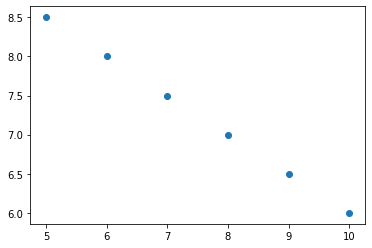

In [0]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0 ]

plt.scatter(car_prices, units_sold)

In [0]:
# Convertir listas en arreglos
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)
prices_array, units_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[8.5],
        [8. ],
        [7.5],
        [7. ],
        [6.5],
        [6. ]]))

In [0]:
# Convertir arreglos en tensores
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()
prices, units

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), tensor([[8.5000],
         [8.0000],
         [7.5000],
         [7.0000],
         [6.5000],
         [6.0000]]))

Last loss: 0.11622719466686249


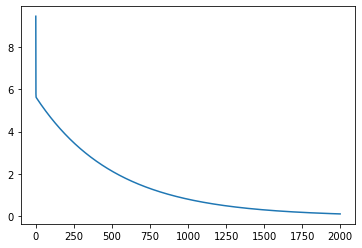

In [0]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()    # MSE: media del cuadrado de los errores
optimizer = optim.SGD(model.parameters(), lr = 0.01)
losses = []
iterations = 2000
for i in range(iterations):
  prediction = model(prices)
  loss = loss_function(prediction, units)
  losses.append(loss.data)

  optimizer.zero_grad()       # Esto es para no acumular los gradientes 
  loss.backward()             # Aqui se realiza el backpropagation
  optimizer.step()            # Se realiza un salto en base a los gradientes calculados
print("Last loss: {}".format(loss))
plt.plot(range(iterations),losses)

# Prediction test
---

In [0]:
x = torch.Tensor([[20.0]])
p = model(x)
p

tensor([[3.3582]], grad_fn=<AddmmBackward>)

# Regresión logística
---

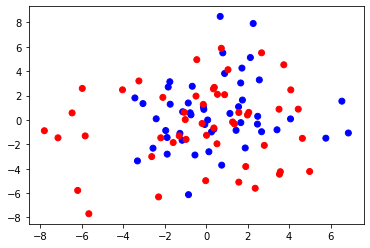

In [0]:
n = 100
h = n//2
dimen = 2
data = np.random.randn(n, dimen)*3
colors = ['blue','red']
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0],data[:,1], c = color)

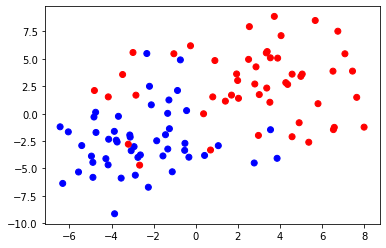

In [0]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))
plt.scatter(data[:,0],data[:,1], c = color)

In [0]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Last loss: 0.2982417345046997


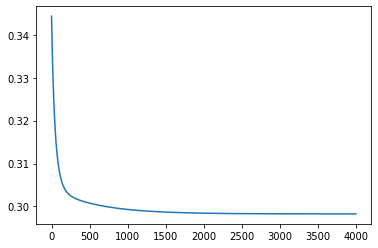

In [0]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses = []
iterations = 4000
for i in range(iterations):
  predict = model(x)
  loss =loss_function(predict,y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print("Last loss: {}".format(loss))
plt.plot(range(iterations),losses)

# Prediction test
---

In [0]:
blue = torch.Tensor([[-5, -1.5]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

blue
